In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [3]:
accidents_causa= pd.read_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_causa.csv")


### Check the table, what I need and what I dont need, understand the information I have

In [4]:
accidents_causa.head()

Case_Number  District_Code District_Name  Neighborhood_Code  \
0  2023S000699                 -1       Unknown                 -1   
1  2023S005197                 -1       Unknown                 -1   
2  2023S007430                 -1       Unknown                 -1   
3  2023S000961                 -1       Unknown                 -1   
4  2023S006486                 -1       Unknown                 -1   

  Neighborhood_Name  Street_Code  \
0           Unknown           -1   
1           Unknown           -1   
2           Unknown           -1   
3           Unknown           -1   
4           Unknown           -1   

                                         Street_Name Postal_Code Day_of_Week  \
0  Rovira (ascendent)                            ...  0             Saturday   
1  Estatut de Catalunya                          ...  11              Friday   
2  Rovira (ascendent)                            ...  0               Friday   
3  Amílcar                                       ...  120           Saturday   
4  Augusta / Hort de la Vila                     ...         NaN    Thursday   

   Year  Month_Code Month_Name  Day_of_Month  Hour_of_Day Shift_Description  \
0  2023           2   February             4           16         Afternoon   
1  2023           9  September             1           13           Morning   
2  2023          12   December            15           11           Morning   
3  2023           1    January            28           14         Afternoon   
4  2023          11   November             2           14         Afternoon   

          Immediate_Cause_Description  UTM_X_Coordinate  UTM_Y_Coordinate  \
0           Lack of driving attention         430443.36        4585232.00   
1            Not respecting distances         429493.73        4587108.15   
2            Not respecting distances         430443.36        4585232.00   
3  Not respecting pedestrian crossing         430955.45        4586335.10   
4              Ignoring traffic light         426883.33        4583690.92   

   Longitude   Latitude  
0   2.166596  41.413783  
1   2.155015  41.430598  
2   2.166596  41.413783  
3   2.172596  41.423762  
4   2.124189  41.399587

In [5]:
accidents_causa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8897 entries, 0 to 8896
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Case_Number                  8897 non-null   object 
 1   District_Code                8897 non-null   int64  
 2   District_Name                8897 non-null   object 
 3   Neighborhood_Code            8897 non-null   int64  
 4   Neighborhood_Name            8897 non-null   object 
 5   Street_Code                  8897 non-null   int64  
 6   Street_Name                  8897 non-null   object 
 7   Postal_Code                  8893 non-null   object 
 8   Day_of_Week                  8897 non-null   object 
 9   Year                         8897 non-null   int64  
 10  Month_Code                   8897 non-null   int64  
 11  Month_Name                   8897 non-null   object 
 12  Day_of_Month                 8897 non-null   int64  
 13  Hour_of_Day       

In [18]:
cause_translation = {
    'Lack of driving attention': 'Lack of driving attention',
    'Not respecting distances': 'Not respecting distances',
    'Not respecting pedestrian crossing': 'Not respecting pedestrian crossing',
    'Ignoring traffic light': 'Ignoring traffic light',
    'Desobeir altres senyals': 'Disobeying other signals',
    'Gir indegut o sense precaució': 'Improper or careless turn',
    'Altres': 'Others',
    'Unknown': 'Unknown',
    'Avançament defectuós/improcedent': 'Improper/defective overtaking',
    'Canvi de carril sense precaució': 'Changing lanes without caution',
    'No determinada': 'Not determined',
    'Manca precaució incorporació circulació': 'Lack of caution when merging into traffic',
    'No cedir la dreta': 'Not yielding the right of way',
    'Manca precaució efectuar marxa enrera': 'Lack of caution when reversing',
    'Envair calçada contrària': 'Encroaching into the opposite lane',
    'Fallada mecànica o avaria': 'Mechanical failure or breakdown'
}

# Replace values in the column
accidents_causa['Immediate_Cause_Description'] = accidents_causa['Immediate_Cause_Description'].replace(cause_translation)

# Verify the replacement
print(accidents_causa['Immediate_Cause_Description'].unique())

['Lack of driving attention' 'Not respecting distances'
 'Not respecting pedestrian crossing' 'Ignoring traffic light'
 'Disobeying other signals' 'Improper or careless turn' 'Others' 'Unknown'
 'Improper/defective overtaking' 'Changing lanes without caution'
 'Not determined' 'Lack of caution when merging into traffic'
 'Not yielding the right of way' 'Lack of caution when reversing'
 'Encroaching into the opposite lane' 'Mechanical failure or breakdown']


### Drop columns i dont need

In [22]:
columns_to_drop = ['District_Code', 'Neighborhood_Code', 'Street_Code', 'Postal_Code']
columns_existing = [col for col in columns_to_drop if col in accidents_causa.columns]
accidents_causa = accidents_causa.drop(columns=columns_existing, inplace=False)

# Display the first few rows
print(accidents_causa.head())

       Case_Number District_Name Neighborhood_Name  \
0  2023S000699           Unknown           Unknown   
1  2023S005197           Unknown           Unknown   
2  2023S007430           Unknown           Unknown   
3  2023S000961           Unknown           Unknown   
4  2023S006486           Unknown           Unknown   

                                         Street_Name Day_of_Week  Year  \
0  Rovira (ascendent)                            ...    Saturday  2023   
1  Estatut de Catalunya                          ...      Friday  2023   
2  Rovira (ascendent)                            ...      Friday  2023   
3  Amílcar                                       ...    Saturday  2023   
4  Augusta / Hort de la Vila                     ...    Thursday  2023   

   Month_Code Month_Name  Day_of_Month  Hour_of_Day Shift_Description  \
0           2   February             4           16         Afternoon   
1           9  September             1           13           Morning   
2          

### check for missing values

In [23]:
print("Missing values in Accidents Causes dataset:")
print(accidents_causa.isnull().sum())

Missing values in Accidents Causes dataset:
Case_Number                               0
District_Name                             0
Neighborhood_Name                         0
Street_Name                               0
Day_of_Week                               0
Year                                      0
Month_Code                                0
Month_Name                                0
Day_of_Month                              0
Hour_of_Day                               0
Shift_Description                         0
Immediate_Cause_Description               0
UTM_X_Coordinate                          0
UTM_Y_Coordinate                          0
Longitude                                 0
Latitude                                  0
Immediate_Cause_Description_Translated    0
datetime                                  0
dtype: int64


### check for unique values

In [24]:
for column in accidents_causa.columns:
    unique_values = accidents_causa['Street_Name'].unique()
    print(f"Column: {'Street_Name'}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: Street_Name
Unique Values: ['Rovira (ascendent)                                '
 'Estatut de Catalunya                              '
 'Amílcar                                           ' ... 'Tàrrega'
 'Foc Follet' 'Emili Roca']
--------------------------------------------------
Column: Street_Name
Unique Values: ['Rovira (ascendent)                                '
 'Estatut de Catalunya                              '
 'Amílcar                                           ' ... 'Tàrrega'
 'Foc Follet' 'Emili Roca']
--------------------------------------------------
Column: Street_Name
Unique Values: ['Rovira (ascendent)                                '
 'Estatut de Catalunya                              '
 'Amílcar                                           ' ... 'Tàrrega'
 'Foc Follet' 'Emili Roca']
--------------------------------------------------
Column: Street_Name
Unique Values: ['Rovira (ascendent)                                '
 'Estatut de Catalunya                   

### Create datetime column

In [9]:
accidents_causa['datetime'] = pd.to_datetime({
    'year': accidents_causa['Year'],
    'month': accidents_causa['Month_Code'],
    'day': accidents_causa['Day_of_Month']
}) + pd.to_timedelta(accidents_causa['Hour_of_Day'], unit='h')

# Display the first few rows with the new datetime column
print(accidents_causa[['datetime']].head())

             datetime
0 2023-02-04 16:00:00
1 2023-09-01 13:00:00
2 2023-12-15 11:00:00
3 2023-01-28 14:00:00
4 2023-11-02 14:00:00


In [13]:
accidents_causa.head()

Case_Number District_Name Neighborhood_Name  \
0  2023S000699           Unknown           Unknown   
1  2023S005197           Unknown           Unknown   
2  2023S007430           Unknown           Unknown   
3  2023S000961           Unknown           Unknown   
4  2023S006486           Unknown           Unknown   

                                         Street_Name Day_of_Week  Year  \
0  Rovira (ascendent)                            ...    Saturday  2023   
1  Estatut de Catalunya                          ...      Friday  2023   
2  Rovira (ascendent)                            ...      Friday  2023   
3  Amílcar                                       ...    Saturday  2023   
4  Augusta / Hort de la Vila                     ...    Thursday  2023   

   Month_Code Month_Name  Day_of_Month  Hour_of_Day Shift_Description  \
0           2   February             4           16         Afternoon   
1           9  September             1           13           Morning   
2          12   December            15           11           Morning   
3           1    January            28           14         Afternoon   
4          11   November             2           14         Afternoon   

          Immediate_Cause_Description  UTM_X_Coordinate  UTM_Y_Coordinate  \
0           Lack of driving attention         430443.36        4585232.00   
1            Not respecting distances         429493.73        4587108.15   
2            Not respecting distances         430443.36        4585232.00   
3  Not respecting pedestrian crossing         430955.45        4586335.10   
4              Ignoring traffic light         426883.33        4583690.92   

   Longitude   Latitude            datetime  
0   2.166596  41.413783 2023-02-04 16:00:00  
1   2.155015  41.430598 2023-09-01 13:00:00  
2   2.166596  41.413783 2023-12-15 11:00:00  
3   2.172596  41.423762 2023-01-28 14:00:00  
4   2.124189  41.399587 2023-11-02 14:00:00

### check for unique values

In [26]:
for column in accidents_causa.columns:
    unique_values = accidents_causa[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 50)

Unique values in column 'Case_Number':
['2023S000699    ' '2023S005197    ' '2023S007430    ' ...
 '2023S000678    ' '2023S006888    ' '2023S004812    ']
--------------------------------------------------
Unique values in column 'District_Name':
['Unknown' 'Sant Martí' 'Ciutat Vella' 'Eixample' 'Sants-Montjuïc'
 'Les Corts' 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu']
--------------------------------------------------
Unique values in column 'Neighborhood_Name':
['Unknown' "el Camp de l'Arpa del Clot" 'el Clot'
 'Sant Martí de Provençals' 'el Besòs i el Maresme' 'la Verneda i la Pau'
 'Provençals del Poblenou' 'el Poblenou'
 'Diagonal Mar i el Front Marítim del Poblenou'
 'el Parc i la Llacuna del Poblenou' 'el Raval'
 'la Vila Olímpica del Poblenou' 'el Barri Gòtic'
 'Sant Pere, Santa Caterina i la Ribera' 'la Barceloneta' 'Sant Antoni'
 "la Nova Esquerra de l'Eixample" "l'Antiga Esquerra de l'Eixample"
 "la Dreta de l'Eixample" 'la Sagrada Família' 'el

In [27]:
#check for weird typing things 
accidents_causa['Street_Name'].unique() 


array(['Rovira (ascendent)                                ',
       'Estatut de Catalunya                              ',
       'Amílcar                                           ', ...,
       'Tàrrega', 'Foc Follet', 'Emili Roca'], dtype=object)

### Delete empty spaces

In [28]:
#delete empty spaces
accidents_causa['Street_Name'] = accidents_causa['Street_Name'].str.strip()


### Convert to numeric values what is necessary

In [29]:
print(accidents_causa.dtypes)
# Convert numeric columns to proper types
numeric_columns = ['Age', 'UTM_X_Coordinate', 'UTM_Y_Coordinate', 'Longitude', 'Latitude']
for col in numeric_columns:
    for df in [accidents_causa]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')  #

Case_Number                                       object
District_Name                                     object
Neighborhood_Name                                 object
Street_Name                                       object
Day_of_Week                                       object
Year                                               int64
Month_Code                                         int64
Month_Name                                        object
Day_of_Month                                       int64
Hour_of_Day                                        int64
Shift_Description                                 object
Immediate_Cause_Description                       object
UTM_X_Coordinate                                 float64
UTM_Y_Coordinate                                 float64
Longitude                                        float64
Latitude                                         float64
Immediate_Cause_Description_Translated            object
datetime                       

### Group not determined and inknnown for others

In [33]:
accidents_causa['Immediate_Cause_Description'] = accidents_causa['Immediate_Cause_Description'].astype(str)
accidents_causa['Driver_Cause_Description'] = accidents_causa['Immediate_Cause_Description'].replace(['Not determined', 'Unknown'], 'Others')

In [6]:
accidents_causa = accidents_causa.drop_duplicates(subset='Case_Number', keep='first')


In [11]:
accidents_causa.head()


Case_Number  District_Code District_Name  Neighborhood_Code  \
0  2023S000699                 -1       Unknown                 -1   
1  2023S005197                 -1       Unknown                 -1   
2  2023S007430                 -1       Unknown                 -1   
3  2023S000961                 -1       Unknown                 -1   
4  2023S006486                 -1       Unknown                 -1   

  Neighborhood_Name  Street_Code  \
0           Unknown           -1   
1           Unknown           -1   
2           Unknown           -1   
3           Unknown           -1   
4           Unknown           -1   

                                         Street_Name Postal_Code Day_of_Week  \
0  Rovira (ascendent)                            ...  0             Saturday   
1  Estatut de Catalunya                          ...  11              Friday   
2  Rovira (ascendent)                            ...  0               Friday   
3  Amílcar                                       ...  120           Saturday   
4  Augusta / Hort de la Vila                     ...         NaN    Thursday   

   Year  ...  Month_Name Day_of_Month  Hour_of_Day  Shift_Description  \
0  2023  ...    February            4           16          Afternoon   
1  2023  ...   September            1           13            Morning   
2  2023  ...    December           15           11            Morning   
3  2023  ...     January           28           14          Afternoon   
4  2023  ...    November            2           14          Afternoon   

          Immediate_Cause_Description UTM_X_Coordinate  UTM_Y_Coordinate  \
0           Lack of driving attention        430443.36        4585232.00   
1            Not respecting distances        429493.73        4587108.15   
2            Not respecting distances        430443.36        4585232.00   
3  Not respecting pedestrian crossing        430955.45        4586335.10   
4              Ignoring traffic light        426883.33        4583690.92   

   Longitude   Latitude            datetime  
0   2.166596  41.413783 2023-02-04 16:00:00  
1   2.155015  41.430598 2023-09-01 13:00:00  
2   2.166596  41.413783 2023-12-15 11:00:00  
3   2.172596  41.423762 2023-01-28 14:00:00  
4   2.124189  41.399587 2023-11-02 14:00:00  

[5 rows x 21 columns]

In [15]:
accidents_causa.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7721 entries, 0 to 8896
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Case_Number                  7721 non-null   object        
 1   District_Code                7721 non-null   int64         
 2   District_Name                7721 non-null   object        
 3   Neighborhood_Code            7721 non-null   int64         
 4   Neighborhood_Name            7721 non-null   object        
 5   Street_Code                  7721 non-null   int64         
 6   Street_Name                  7721 non-null   object        
 7   Postal_Code                  7717 non-null   object        
 8   Day_of_Week                  7721 non-null   object        
 9   Year                         7721 non-null   int64         
 10  Month_Code                   7721 non-null   int64         
 11  Month_Name                   7721 non-null   obj

In [17]:
print(accidents_causa['datetime'].unique())

<DatetimeArray>
['2023-02-04 16:00:00', '2023-09-01 13:00:00', '2023-12-15 11:00:00',
 '2023-01-28 14:00:00', '2023-11-02 14:00:00', '2023-05-08 01:00:00',
 '2023-05-13 18:00:00', '2023-11-19 07:00:00', '2023-02-22 21:00:00',
 '2023-09-26 17:00:00',
 ...
 '2023-12-26 18:00:00', '2023-06-17 06:00:00', '2023-09-04 14:00:00',
 '2023-09-08 14:00:00', '2023-03-04 07:00:00', '2023-09-07 23:00:00',
 '2023-06-09 15:00:00', '2023-09-25 17:00:00', '2023-07-12 17:00:00',
 '2023-11-20 14:00:00']
Length: 4560, dtype: datetime64[ns]


In [19]:
accidents_causa = accidents_causa.dropna(subset=['datetime'])

### export data

In [20]:
accidents_causa.to_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023_accidents_causa_cleaned.csv", index=False)


# VISUAL

# Create a chart that shows streets with more accidents

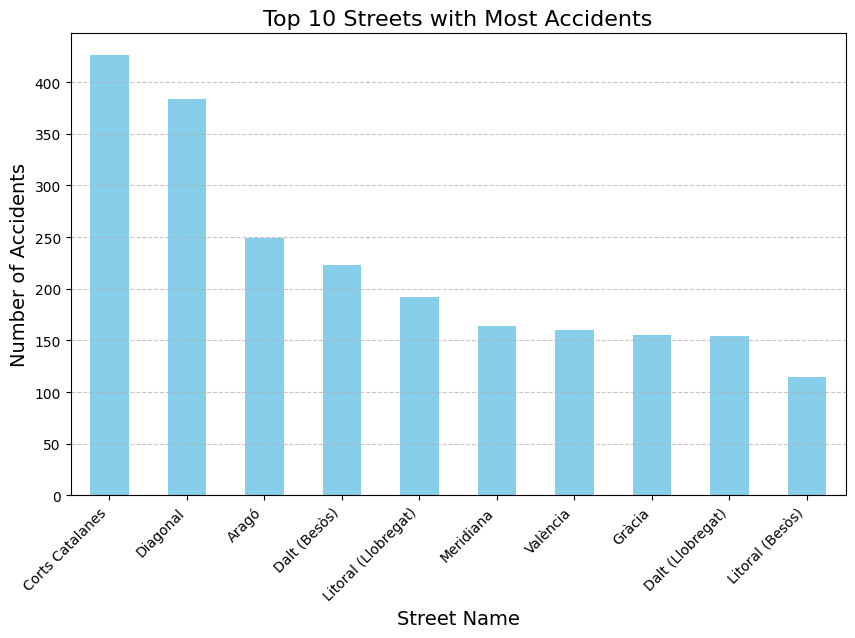

In [24]:
streets_accidents = accidents_causa['Street_Name'].value_counts().head(10)


plt.figure(figsize=(10, 6))
streets_accidents.plot(kind='bar', color='skyblue')
plt.title('Top 10 Streets with Most Accidents', fontsize=16)
plt.xlabel('Street Name', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a chart to show the dayframe of the accidents 

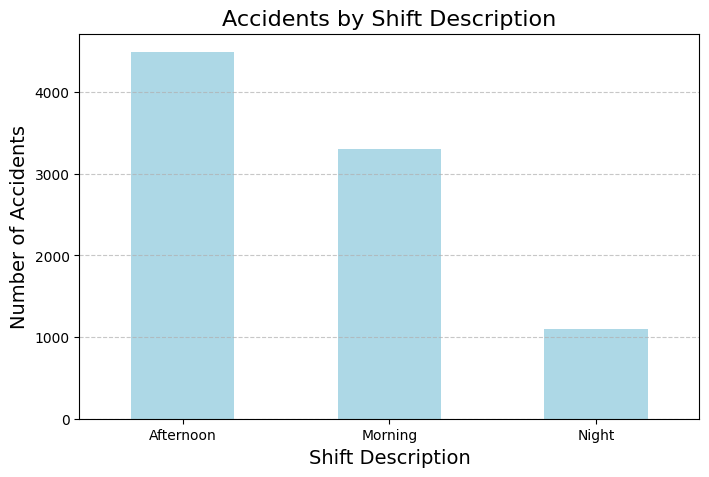

In [25]:
shift_counts = accidents_causa['Shift_Description'].value_counts()
plt.figure(figsize=(8, 5))
shift_counts.plot(kind='bar', color='lightblue')
plt.title('Accidents by Shift Description', fontsize=16)
plt.xlabel('Shift Description', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Map of accidents by location

In [26]:
accidents_map = folium.Map(location=[41.3851, 2.1734], zoom_start=12)  # Barcelona coordinates

# Add accident points to the map
for _, row in accidents_causa.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(accidents_map)

# Display the map
accidents_map

# Heat map concentration of accidents by location

In [28]:
heat_data = accidents_causa[['Latitude', 'Longitude']].values.tolist()

# Initialize a folium map
heatmap_map = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# Add the heatmap
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(heatmap_map)

# Display the heatmap
heatmap_map

# Top driver causes of accidents

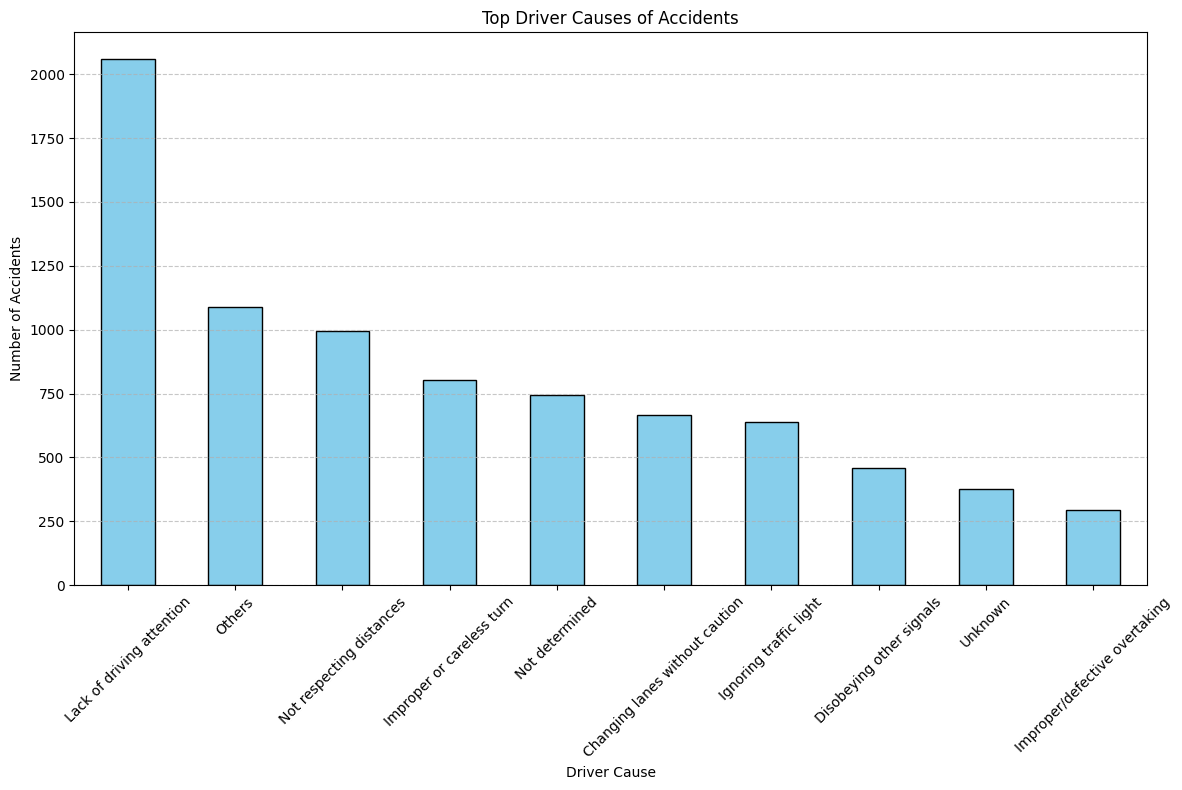

In [34]:
top_driver_causes = accidents_causa['Immediate_Cause_Description'].value_counts().head(10)

# Plot the top driver causes
plt.figure(figsize=(12, 8))
top_driver_causes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Driver Causes of Accidents')
plt.xlabel('Driver Cause')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top driver causes of accidents by time

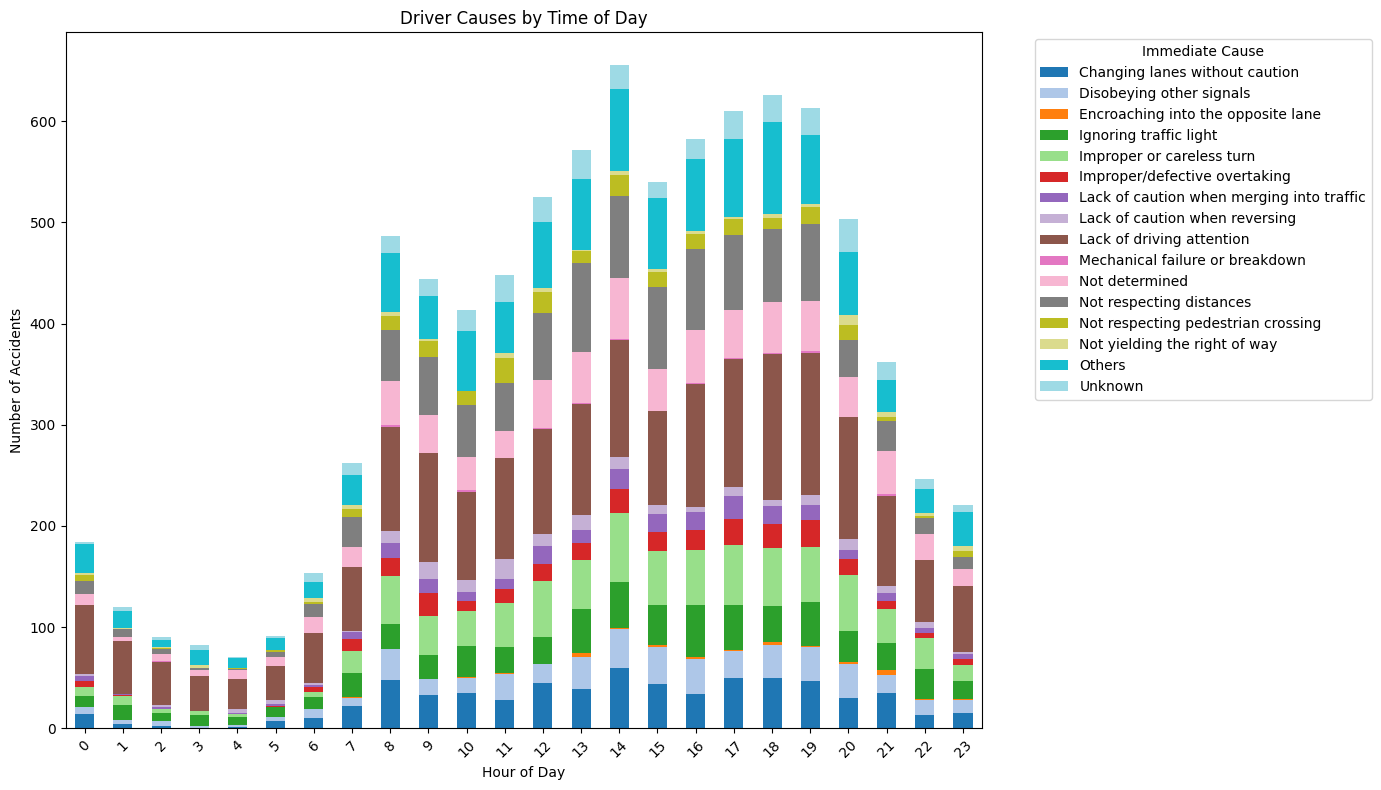

In [39]:
cause_by_hour = accidents_causa.groupby(['Hour_of_Day', 'Immediate_Cause_Description']).size().unstack(fill_value=0)

# Plot a stacked bar chart
cause_by_hour.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Driver Causes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Immediate Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Peak Hours for Accidents

### Scatter plot

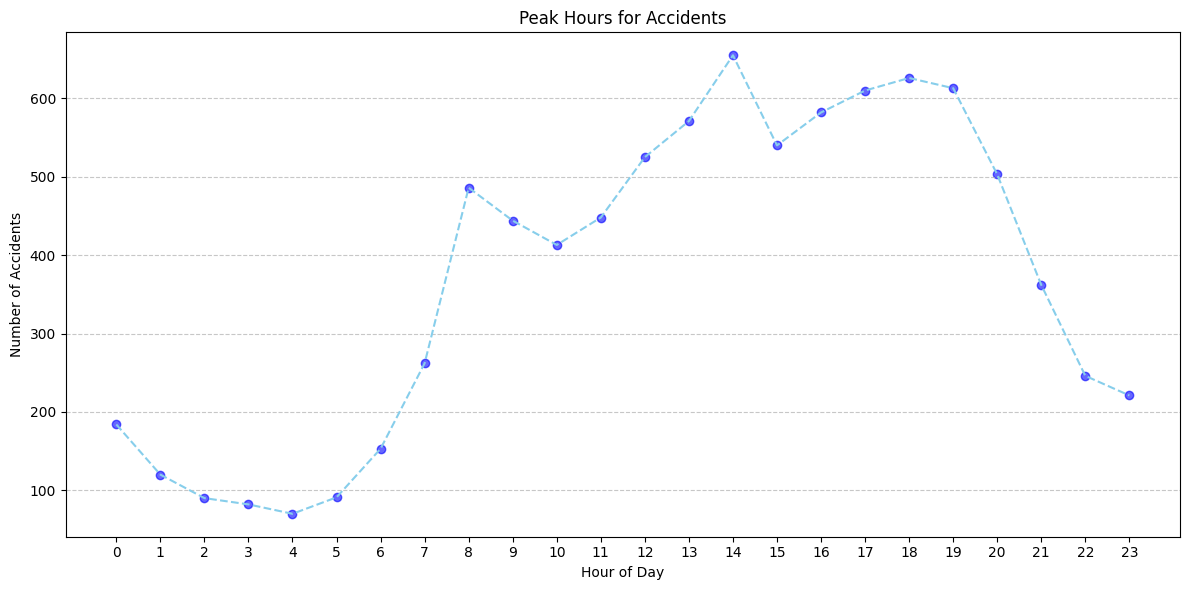

In [41]:
accidents_by_hour = accidents_causa.groupby('Hour_of_Day').size().reset_index(name='Count')

# Plot scatter
plt.figure(figsize=(12, 6))
plt.scatter(accidents_by_hour['Hour_of_Day'], accidents_by_hour['Count'], color='blue', alpha=0.6)
plt.plot(accidents_by_hour['Hour_of_Day'], accidents_by_hour['Count'], color='skyblue', linestyle='--')
plt.title('Peak Hours for Accidents')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Density plot

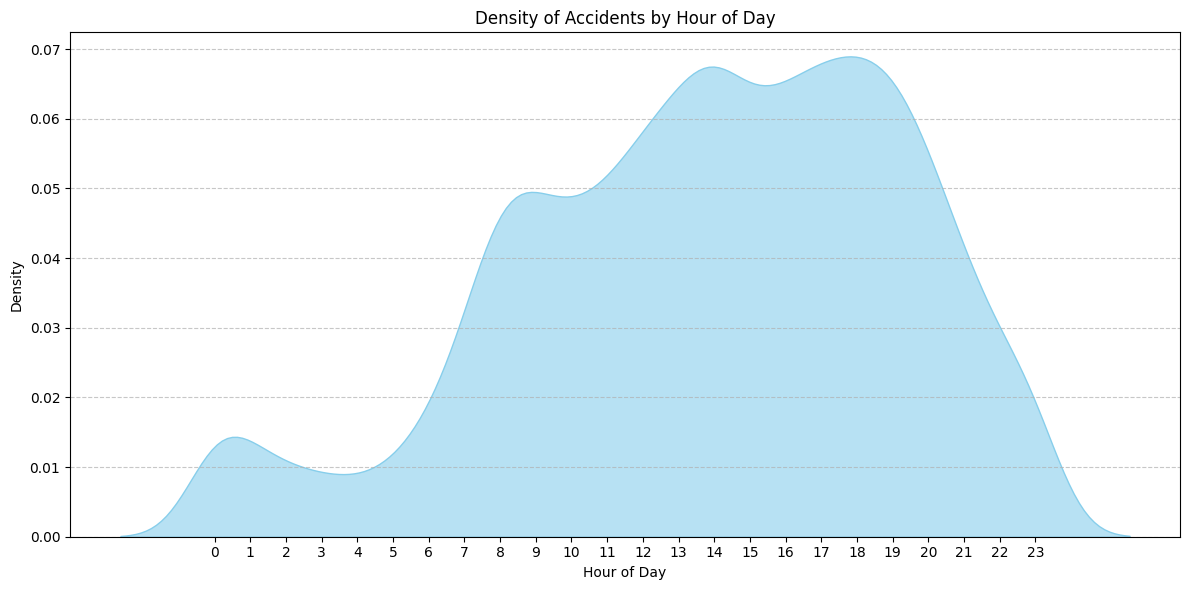

In [42]:
plt.figure(figsize=(12, 6))
sns.kdeplot(accidents_causa['Hour_of_Day'], fill=True, color='skyblue', alpha=0.6)
plt.title('Density of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()